In [8]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import argparse
import cv2
import os

In [9]:
prototxtPath = r"face_detector\deploy.prototxt"
weightsPath = r"face_detector\res10_300x300_ssd_iter_140000.caffemodel"
net = cv2.dnn.readNet(prototxtPath, weightsPath)

In [10]:
maskNet = load_model("mask_detector.model")

In [11]:
def plot_image(imagepath):
    image = cv2.imread(imagepath)

    orig = image.copy()
    (h, w) = image.shape[:2]
    # construct a blob from the image
    blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300),
        (104.0, 177.0, 123.0))

    net.setInput(blob)
    detections = net.forward()

    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.5:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            (startX, startY) = (max(0, startX), max(0, startY))
            (endX, endY) = (min(w - 1, endX), min(h - 1, endY))
            face = image[startY:endY, startX:endX]
            face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
            face = cv2.resize(face, (224, 224))
            face = img_to_array(face)
            face = preprocess_input(face)
            face = np.expand_dims(face, axis=0)
            (mask, withoutMask) = maskNet.predict(face)[0]
            label = "Mask" if mask > withoutMask else "No Mask"
            color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
            label = "{}:{:.2f}%".format(label, max(mask, withoutMask) * 100)
            cv2.putText(image, label, (startX, startY - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 2, color, 3)
            cv2.rectangle(image, (startX, startY), (endX, endY), color, 10)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGBA)
    plt.grid(False)
    plt.axis('off')
    plt.imshow(image)

In [12]:
import matplotlib.pyplot as plt

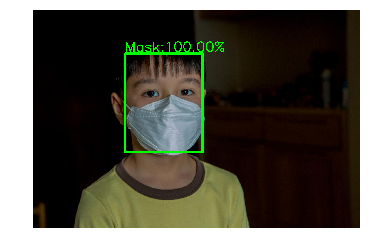

In [13]:
mark = os.path.join('archive', 'C55A2274.jpg')
plot_image(mark)

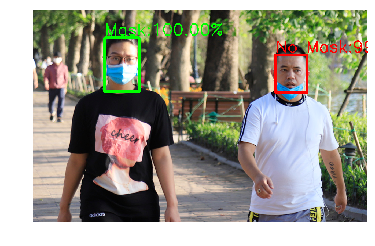

In [14]:
nomark = os.path.join('archive', 'Screenshot_1.png')
plot_image(nomark)